# HOUSE PRICE PROJECT

In [184]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error



In [140]:
data=pd.read_csv('Downloads/Housing.csv')

In [141]:
data.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [142]:
data.shape


(545, 13)

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [144]:
data.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [145]:
data.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#price per square feet


In [147]:
data['price_sqr_feet']=data['price']*100000/data['area']

In [148]:
data['price_sqr_feet']


0      1.792453e+08
1      1.367188e+08
2      1.229920e+08
3      1.628667e+08
4      1.537736e+08
           ...     
540    6.066667e+07
541    7.363125e+07
542    4.834254e+07
543    6.013746e+07
544    4.545455e+07
Name: price_sqr_feet, Length: 545, dtype: float64

In [149]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking,price_sqr_feet
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,9.933270e+07
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,3.465370e+07
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,2.703956e+07
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,7.453704e+07
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,9.523810e+07
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,1.184615e+08
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,2.640000e+08


In [150]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_sqr_feet
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.792453e+08
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1.367188e+08
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1.229920e+08
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1.628667e+08
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1.537736e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,6.066667e+07
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,7.363125e+07
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,4.834254e+07
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,6.013746e+07


In [155]:

counter = 0
rs,cs = df.shape
data.drop_duplicates(inplace=True)

if data.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-data.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> -541


In [187]:
from sklearn.preprocessing import LabelEncoder
categ = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

In [169]:
corr = data.corr()


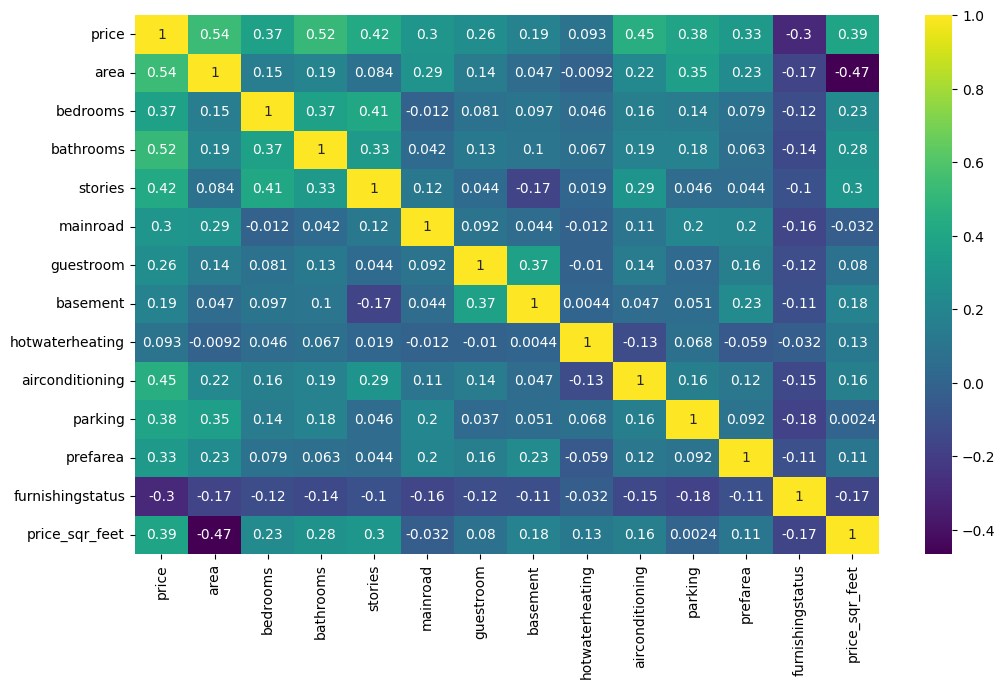

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap="viridis",annot=True)
plt.show()

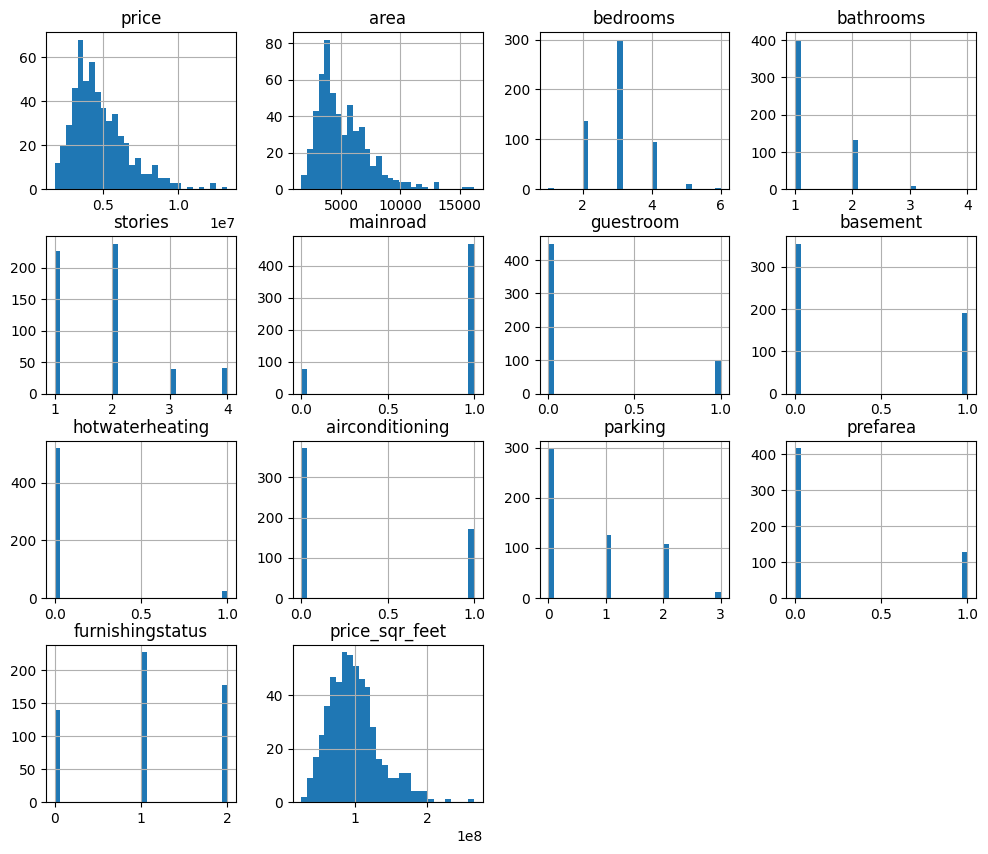

In [177]:
data.hist(figsize=(12,10),bins=30)
plt.show()

In [175]:
X = data.drop(['price'],axis=1)
y = data['price']

# LINEAR REGRESSION:

In [181]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [117]:
y_predict

array([200000.])

In [178]:
from sklearn.metrics import r2_score,mean_absolute_error
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

C:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [179]:
score

nan

In [152]:
mae

2.9103830456733704e-11